<a href="https://colab.research.google.com/github/vpkrishna/mlfundas/blob/main/Hessian_semidefinitepositive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

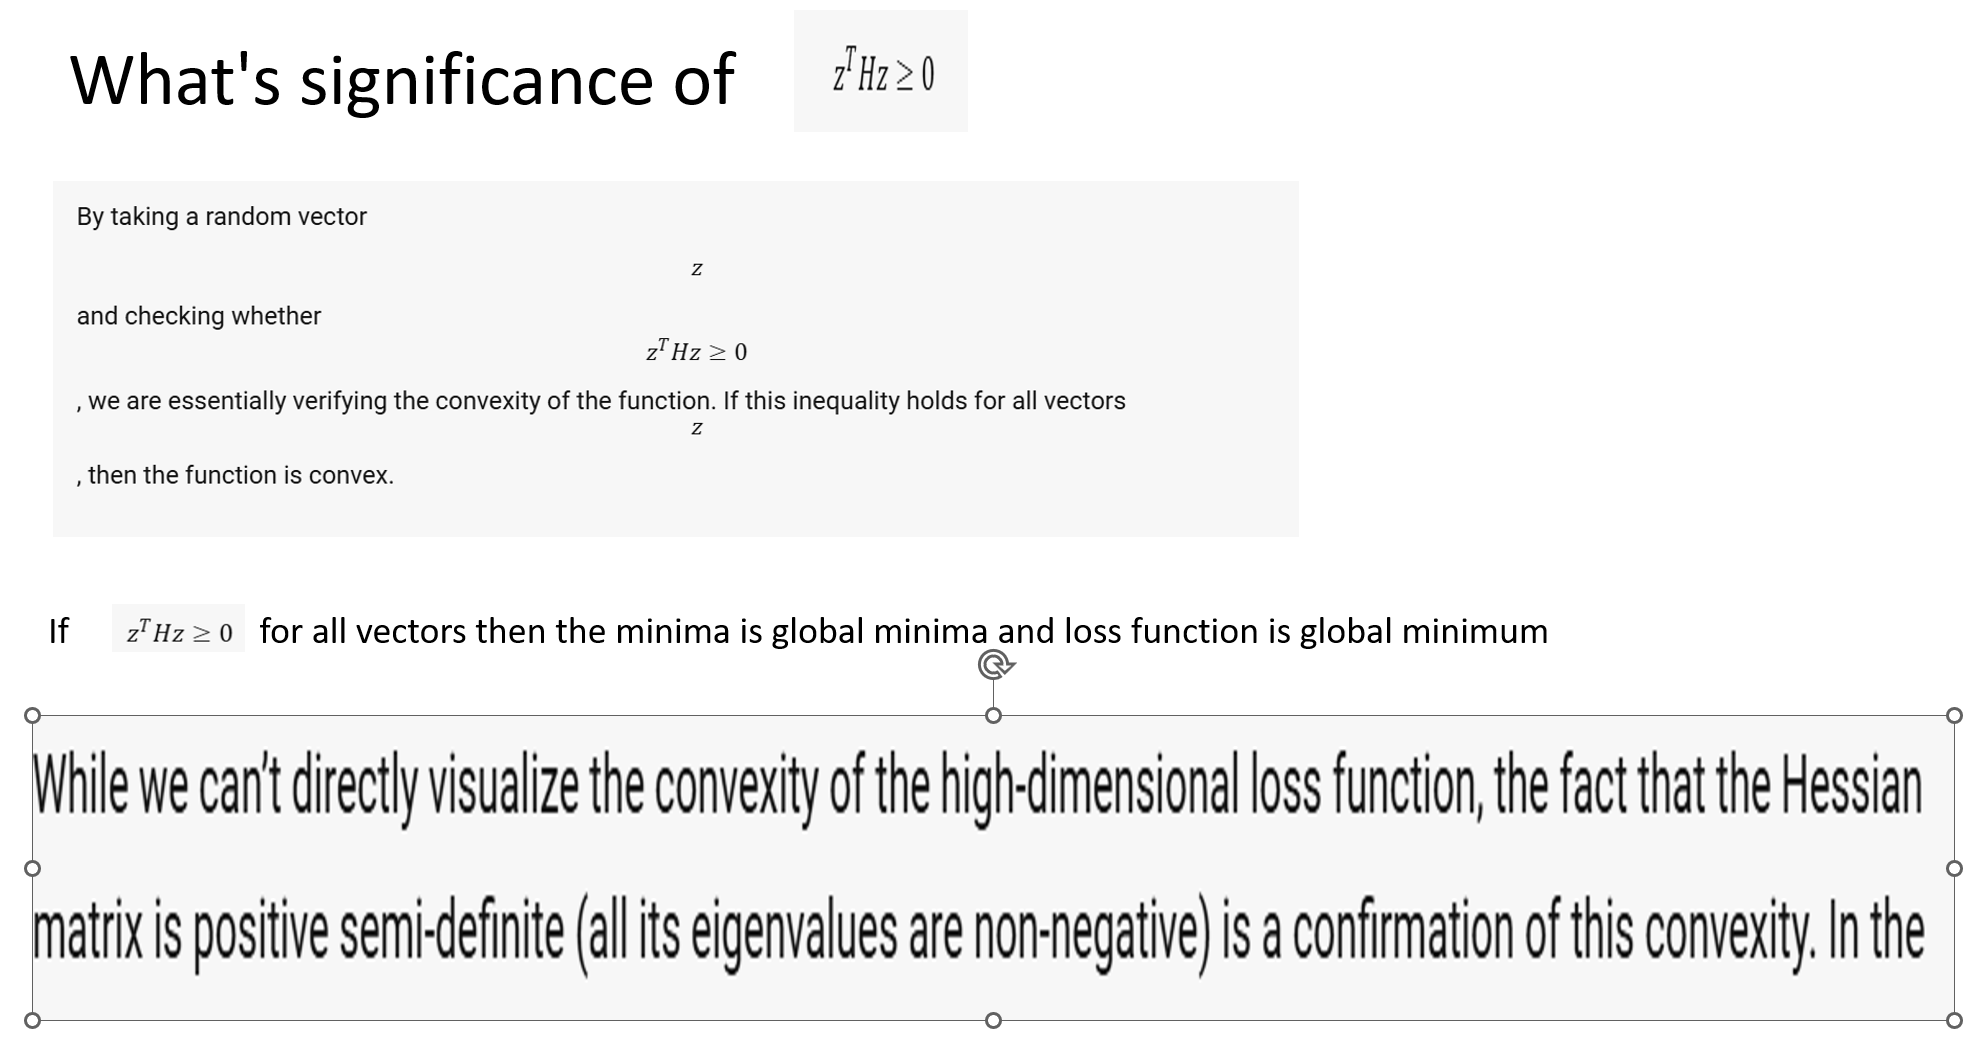**bold text**

In [ ]:
import numpy as np
import plotly.graph_objects as go
import numpy.linalg as la
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = datasets.load_breast_cancer()
X = data['data']    # Features
y = data['target']  # Target

# Train the logistic regression model using sklearn
model = LogisticRegression(max_iter=50000)
model.fit(X, y)

# Get the predictions
predictions = model.predict_proba(X)[:, 1]

## The following below is another way to calculate the Hessian ..Rather than taking firstd erivatibe
def compute_hessian(X, predictions):
    # Compute the diagonal matrix D
    D = np.diag(predictions * (1 - predictions))

    # Compute the Hessian
    H = np.dot(np.dot(X.T, D), X)

    return H

# Compute the Hessian
H = compute_hessian(X, predictions)

# Verify positive semi-definiteness by checking z^THz >= 0 for some random vectors z
z_values = []
results = []
for _ in range(10):
    z = np.random.rand(H.shape[0])
    result = np.dot(z.T, np.dot(H, z))
    z_values.append(z)
    results.append(result)
    print(f"z^THz = {result}")


# Create a scatter plot of z^THz for different vectors z
fig = go.Figure(data=go.Scatter(x=list(range(10)), y=results, mode='markers'))
fig.update_layout(title='z^THz for different vectors z', xaxis_title='Vector z', yaxis_title='z^THz')
fig.show()

z^THz = 11371140.32525108
z^THz = 11022290.796918822
z^THz = 5580386.687953824
z^THz = 37055650.15378686
z^THz = 15293470.486470902
z^THz = 23535893.942883436
z^THz = 12763068.47064931
z^THz = 9532235.784550587
z^THz = 6470707.721771306
z^THz = 26255242.537030324


In [ ]:
import numpy as np
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Generate a hypothetical dataset
np.random.seed(0)
apples = np.random.multivariate_normal([5, 5], [[1, 0.5],[0.5, 1]], 100)
oranges = np.random.multivariate_normal([2, 2], [[1, -0.5],[-0.5, 1]], 100)

# Combine the data
X = np.vstack((apples, oranges))
y = np.array([0]*100 + [1]*100)  # Labels: 0 for apples, 1 for oranges

# Apply GDA (LDA in this case)
lda = LDA()
lda.fit(X, y)

# Predict the class of a new fruit
new_fruit = np.array([[3, 3]])
prediction = lda.predict(new_fruit)
print("Predicted class:", "Apple" if prediction == 0 else "Orange")

# Visualize the distribution using Plotly
fig = px.scatter(x=X[:,0], y=X[:,1], color=y.astype(str), labels={'color': 'Class'})
fig.add_trace(px.scatter(x=new_fruit[:,0], y=new_fruit[:,1], color=['New Fruit']).data[0])
fig.show()

Predicted class: Orange


In [ ]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Define the number of samples for each class
n_samples = 100

# Define the mean and covariance for class y=0
mean0 = [0, 0]
cov0 = [[1, 0.5], [0.5, 1]]
X0 = np.random.multivariate_normal(mean0, cov0, n_samples)
y0 = np.zeros(n_samples)

# Define the mean and covariance for class y=1
mean1 = [1, 1]
cov1 = [[1, 0.5], [0.5, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
y1 = np.ones(n_samples)

# Concatenate the data from the two classes to get the full dataset
X = np.concatenate([X0, X1])
y = np.concatenate([y0, y1])

# Calculate the means and covariance matrices for each class
mean0_est = np.mean(X[y == 0], axis=0)
cov0_est = np.cov(X[y == 0].T)
mean1_est = np.mean(X[y == 1], axis=0)
cov1_est = np.cov(X[y == 1].T)

print("Estimated mean for class y=0: ", mean0_est)
print("Estimated covariance for class y=0: \n", cov0_est)
print("Estimated mean for class y=1: ", mean1_est)
print("Estimated covariance for class y=1: \n", cov1_est)

Estimated mean for class y=0:  [-0.07055996  0.07221871]
Estimated covariance for class y=0: 
 [[1.02998695 0.53063457]
 [0.53063457 1.07358616]]
Estimated mean for class y=1:  [1.18038479 1.06743416]
Estimated covariance for class y=1: 
 [[0.84965796 0.4887774 ]
 [0.4887774  0.98686041]]


In [ ]:
import plotly.graph_objects as go

# Create a scatter plot for class y=0
trace0 = go.Scatter(
    x = X0[:,0],
    y = X0[:,1],
    mode = 'markers',
    name = 'Class 0',
    marker = dict(
        color = 'rgba(255, 128, 255, 0.8)',
    )
)

# Create a scatter plot for class y=1
trace1 = go.Scatter(
    x = X1[:,0],
    y = X1[:,1],
    mode = 'markers',
    name = 'Class 1',
    marker = dict(
        color = 'rgba(255, 178, 102, 0.8)',
    )
)

# Create a scatter plot for the means of each class
trace2 = go.Scatter(
    x = [mean0_est[0], mean1_est[0]],
    y = [mean0_est[1], mean1_est[1]],
    mode = 'markers',
    name = 'Class Means',
    marker = dict(
        color = 'rgba(0, 0, 0, 1)',
        size = 10,
        line = dict(
            color = 'rgba(0, 0, 0, 1)',
            width = 2
        )
    )
)

data = [trace0, trace1, trace2]

layout = dict(title = 'Scatter plot of synthetic data',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
go.Figure(fig).show()

In [ ]:

import numpy as np
import plotly.graph_objects as go
from scipy.stats import multivariate_normal

# Define the mean and covariance for each fruit class
parameters = [
    {"mu": np.array([5, 5]), "Sigma": np.array([[1, 0.5], [0.5, 1]])},  # Apples
    {"mu": np.array([2, 2]), "Sigma": np.array([[1, -0.5], [-0.5, 1]])}  # Oranges
]

# Create a grid of points for 2D space
x, y = np.mgrid[0:10:.1, 0:10:.1]
pos = np.dstack((x, y))

# Create the multivariate normal distributions
rvs = [multivariate_normal(p["mu"], p["Sigma"]) for p in parameters]

# Create the figure
fig = go.Figure()

# Add the distributions to the figure
for rv, color in zip(rvs, ['Reds', 'Blues']):
    # Calculate the PDF of each distribution on the grid
    pdf = rv.pdf(pos)
    # Add a surface trace for each distribution
    fig.add_trace(go.Surface(x=x, y=y, z=pdf, colorscale=color))

# Update the layout
fig.update_layout(title='Gaussian Distributions of Apples and Oranges', autosize=False,
                  width=700, height=700,
                  scene=dict(
                      xaxis_title='Sweetness',
                      yaxis_title='Crunchiness',
                      zaxis_title='Probability Density',
                      aspectratio=dict(x=1, y=1, z=0.8)))

# Show the figure
fig.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import multivariate_normal

# Generate synthetic data for apples and oranges
np.random.seed(0)
apples = np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], 100)
oranges = np.random.multivariate_normal([2, 2], [[1, -0.5], [-0.5, 1]], 100)

# Combine the data into a single dataset
X = np.vstack((apples, oranges))
y = np.array([0]*100 + [1]*100)  # Labels: 0 for apples, 1 for oranges

# Create a grid of points for 2D space
x, y = np.mgrid[0:10:.1, 0:10:.1]
pos = np.dstack((x, y))

# Create a combined multivariate normal distribution
combined_rv = multivariate_normal(mean=np.mean(X, axis=0), cov=np.cov(X.T))

# Calculate the PDF of the combined distribution on the grid
pdf = combined_rv.pdf(pos)

# Create the figure
fig = go.Figure()

# Add a surface trace for the combined distribution
fig.add_trace(go.Surface(x=x, y=y, z=pdf, colorscale='Viridis', showscale=False))

# Add scatter plot for the individual data points
y_labels = y.tolist()

# Add scatter plot for the individual data points
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=[0]*200,
                           mode='markers',
                           marker=dict(size=5,
                                       color=['red' if label == 0 else 'blue' for label in y_labels], # Explicit color assignment
                                       opacity=0.8)))
# Update the layout
fig.update_layout(title='Combined Gaussian Distribution with Class Separation', autosize=False,
                  width=700, height=700,
                  scene=dict(
                      xaxis_title='Sweetness',
                      yaxis_title='Crunchiness',
                      zaxis_title='Probability Density',
                      aspectratio=dict(x=1, y=1, z=0.8)))

# Show the figure
fig.show()


# Create the multivariate normal distributions
rvs = [multivariate_normal(p["mu"], p["Sigma"]) for p in parameters]

# Create the figure
fig = go.Figure()

# Add the distributions to the figure
for rv, color in zip(rvs, ['Reds', 'Blues']):
    # Calculate the PDF of each distribution on the grid
    pdf = rv.pdf(pos)
    # Add a surface trace for each distribution
    fig.add_trace(go.Surface(x=x, y=y, z=pdf, colorscale=color))

# Update the layout
fig.update_layout(title='Gaussian Distributions of Apples and Oranges', autosize=False,
                  width=700, height=700,
                  scene=dict(
                      xaxis_title='Sweetness',
                      yaxis_title='Crunchiness',
                      zaxis_title='Probability Density',
                      aspectratio=dict(x=1, y=1, z=0.8)))

# Show the figure
fig.show()